0- CHOOSE AN AREA WITH WATER BODY
1- Load sentinel 2 using ard
80% cloud free image
3- calculate NOVA, EVI, LAI
4- PLOT THE 3 INDICES OUT
5- FILTERED NOVI>=0
6- FILTERED EVI>=0
7- FILTERED LAI>=0
8- PLOT THE TIMESERIES ANALYSIS

In [1]:
import datacube as dcb

In [2]:
dc=dcb.Datacube(app='assignment3')

7.42205°N, 4.09481°E
7.35991°N, 4.16571°E


In [3]:
x_range=4.16571,4.09481
y_range=7.35991,7.42205

In [4]:
from deafrica_tools.plotting import display_map

In [5]:
display_map(x_range, y_range)

In [6]:
from deafrica_tools.bandindices import calculate_indices

In [7]:
from deafrica_tools.datahandling import load_ard

In [8]:
ds_s2=load_ard(dc, products=['s2_l2a'], 
                    min_gooddata=0.7,
                    time=('01-2022', '07-2022'),
                    x=x_range,
                    y=y_range,
                    resolution=(-10, 10),
                    output_crs='EPSG:6933',
               measurements=['blue','red', 'green', 'nir', 'swir_1']
                   )

Using pixel quality parameters for Sentinel 2
Finding datasets
    s2_l2a
Counting good quality pixels for each time step


CPLReleaseMutex: Error = 1 (Operation not permitted)


Filtering to 6 out of 41 time steps with at least 70.0% good quality pixels
Applying pixel quality/cloud mask
Loading 6 time steps


In [9]:
ds_s2

<xarray.Dataset>
Dimensions:      (time: 6, y: 787, x: 685)
Coordinates:
  * time         (time) datetime64[ns] 2022-01-10T10:18:44 ... 2022-05-15T10:...
  * y            (y) float64 9.443e+05 9.443e+05 ... 9.364e+05 9.364e+05
  * x            (x) float64 3.951e+05 3.951e+05 ... 4.019e+05 4.019e+05
    spatial_ref  int32 6933
Data variables:
    blue         (time, y, x) float32 470.0 426.0 379.0 ... 231.0 555.0 380.0
    red          (time, y, x) float32 961.0 790.0 763.0 ... 1.032e+03 653.0
    green        (time, y, x) float32 789.0 650.0 630.0 ... 554.0 831.0 654.0
    nir          (time, y, x) float32 2.346e+03 2.192e+03 ... 2.287e+03
    swir_1       (time, y, x) float32 2.592e+03 2.592e+03 ... 1.744e+03
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

In [10]:
from deafrica_tools.plotting import rgb

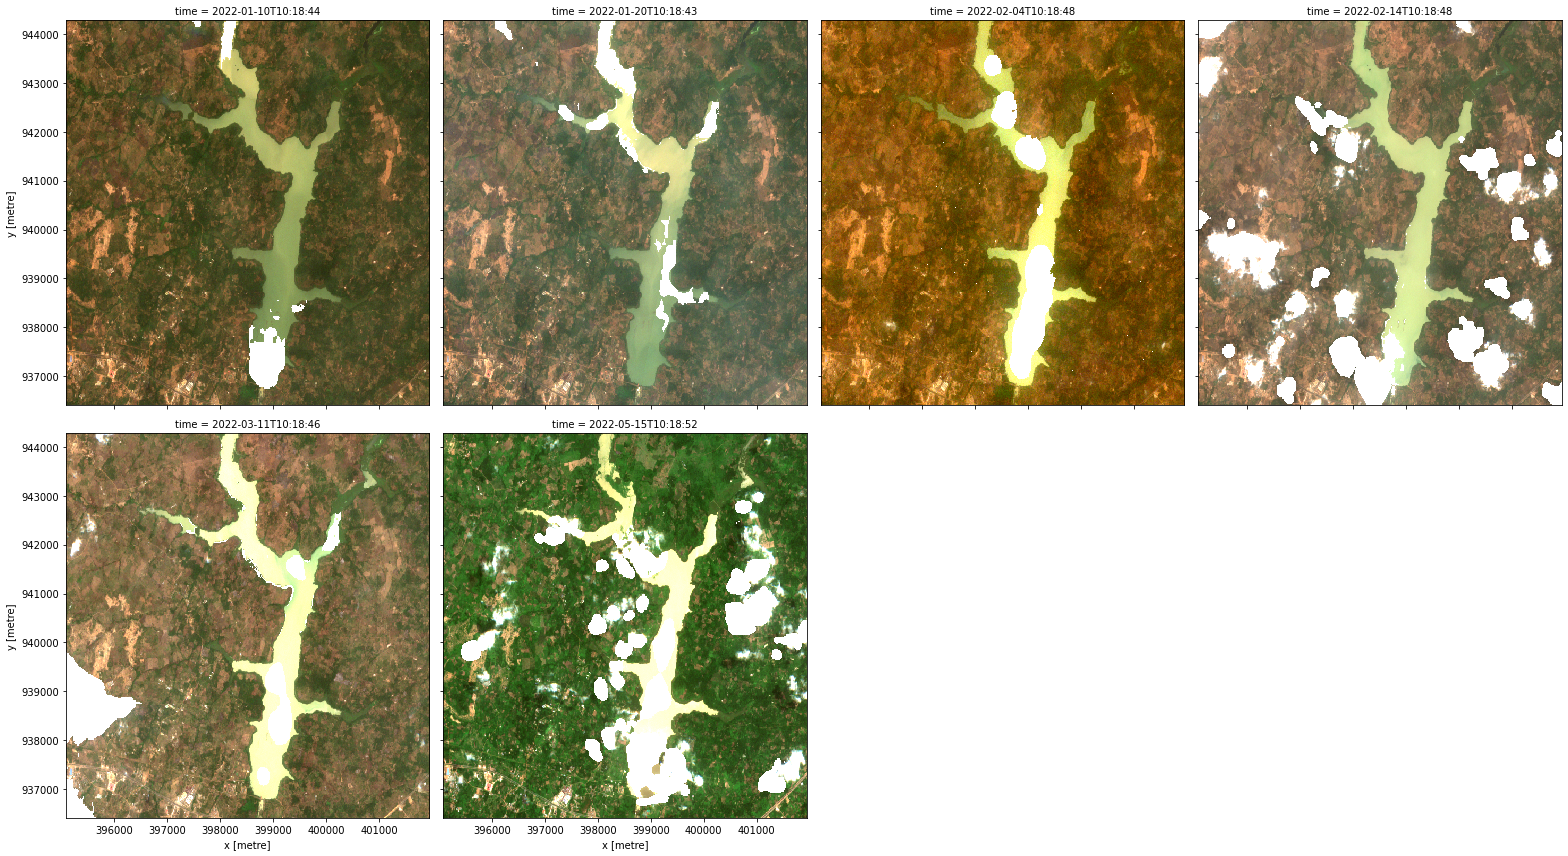

In [11]:
rgb(ds_s2, col='time')

In [13]:
indice = calculate_indices(ds_s2, index=['NDVI','EVI', 'LAI'], satellite_mission='s2')

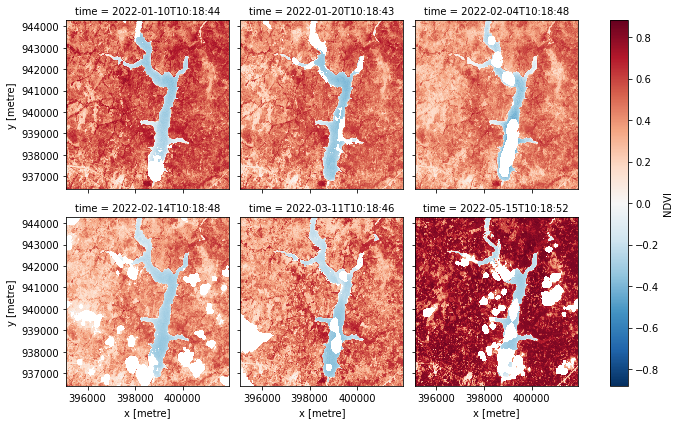

In [34]:
indice['NDVI'].plot(col='time', col_wrap=3)

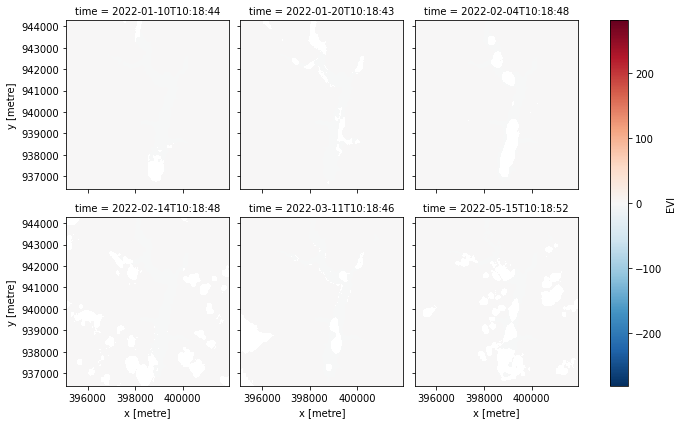

In [15]:
indice['EVI'].plot(col='time', col_wrap=3)

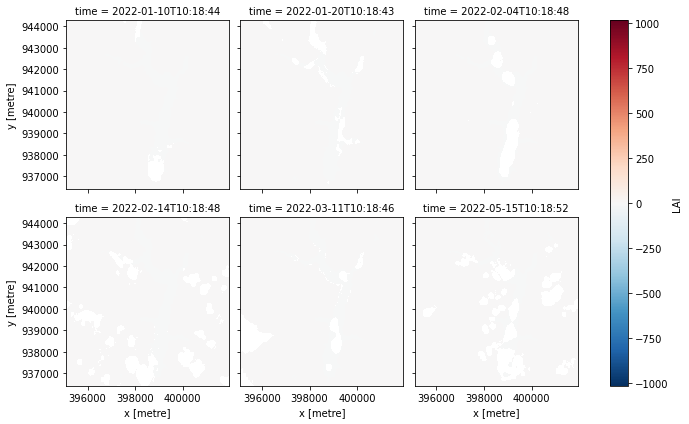

In [16]:
indice['LAI'].plot(col='time', col_wrap=3)

In [17]:
FILTRED_NDVI=indice.where(indice['NDVI'] >=0.5)['NDVI']

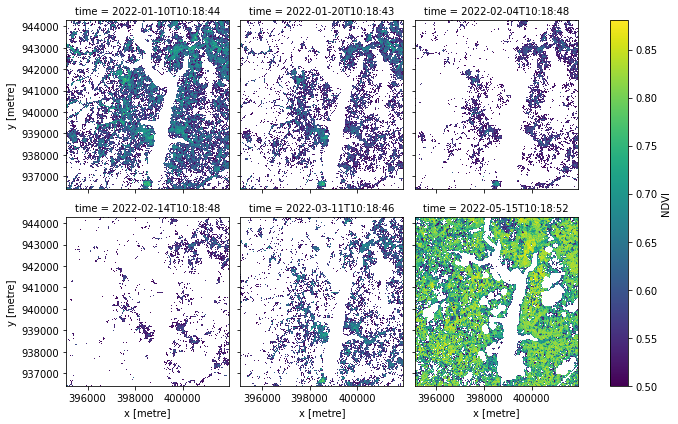

In [18]:
FILTRED_NDVI.plot(col='time', col_wrap=3)

In [19]:
FILTRED_EVI=indice.where(indice['EVI'] >=0.3)['EVI']

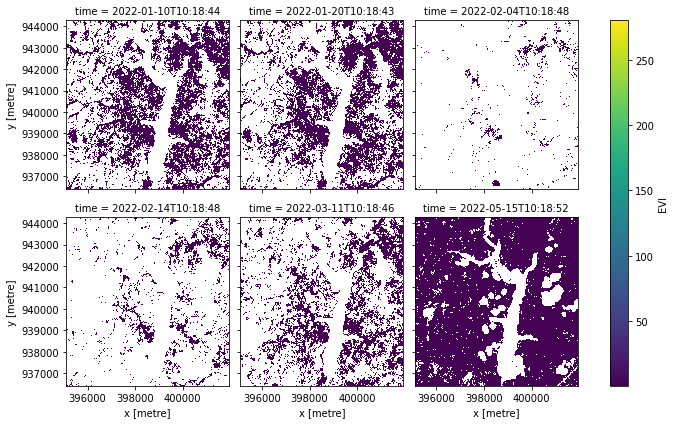

In [20]:
FILTRED_EVI.plot(col='time', col_wrap=3)

In [21]:
FILTRED_LAI=indice.where(indice['LAI'] >=0.3)['EVI']

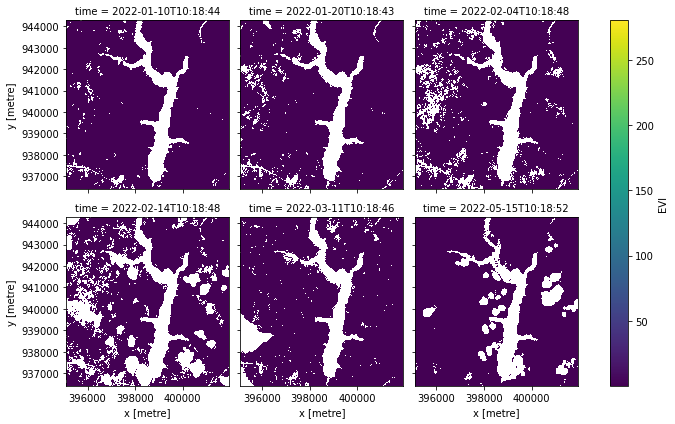

In [22]:
FILTRED_LAI.plot(col='time', col_wrap=3)

In [27]:
time_s = indice['NDVI'].mean(dim=['x','y'])

In [24]:
import matplotlib.pyplot as plt

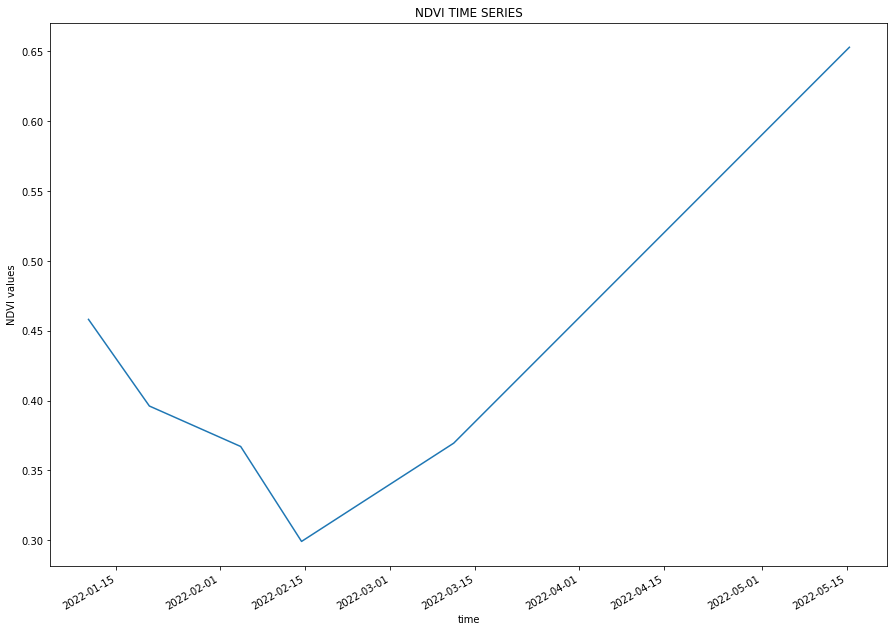

In [25]:
time_s.plot(size=10)
plt.title('NDVI TIME SERIES')
plt.ylabel('NDVI values')
plt.xlabel('time')
plt.show()



In [28]:
time_s = indice['EVI'].mean(dim=['x','y'])

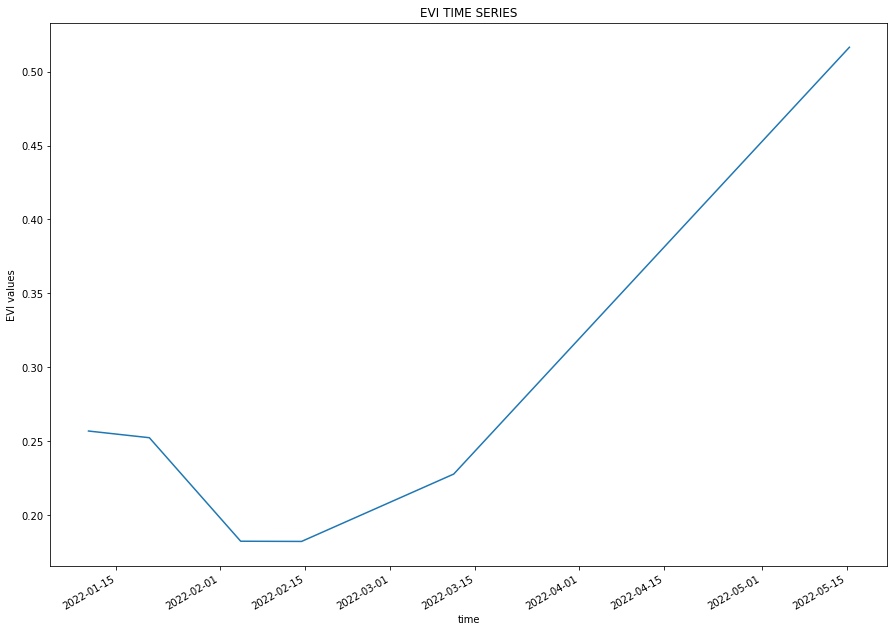

In [29]:
time_s.plot(size=10)
plt.title('EVI TIME SERIES')
plt.ylabel('EVI values')
plt.xlabel('time')
plt.show()

In [30]:
time_s = indice['LAI'].mean(dim=['x','y'])

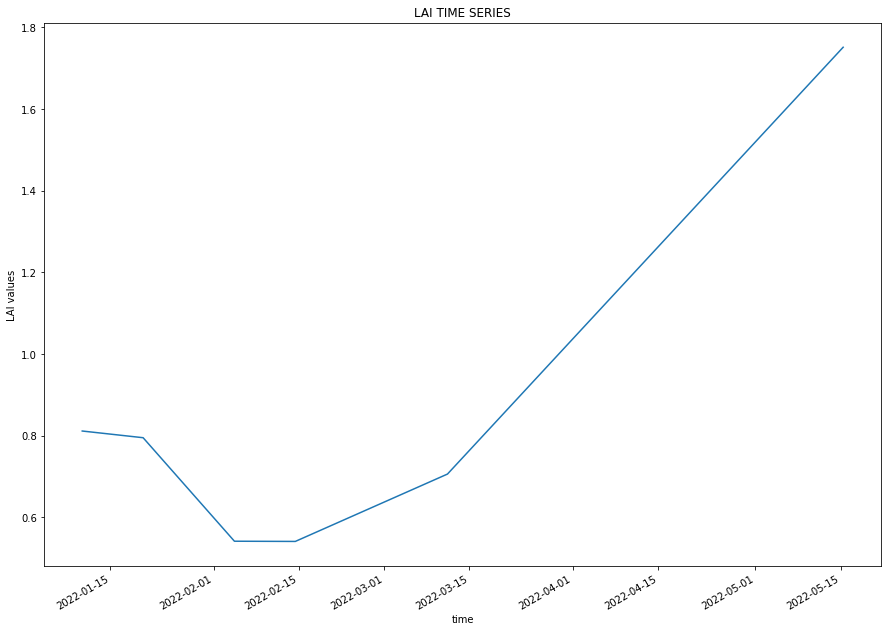

In [31]:
time_s.plot(size=10)
plt.title('LAI TIME SERIES')
plt.ylabel('LAI values')
plt.xlabel('time')
plt.show()